In [145]:
import bs4
import lxml
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import seaborn as sea

In [137]:
url_vehicles_iea = "https://www.iea.org/data-and-statistics/charts/average-price-and-driving-range-of-bevs-2010-2019"
request_text = urllib.request.urlopen(url_vehicles_iea).read()
page = bs4.BeautifulSoup(request_text, "lxml")

In [138]:
tableau1 = page.find("div", {'class' : "m-chart-block"}) #on recupére les données qui nous intéressent (au 26/11/2023)

In [139]:
data1= list(tableau1.get('data-chart-csv'))
data=data1[(data1.index('\n')+1):]  #on a les data sous forme de string, on va les reshaper

In [142]:
annee=[]
auto=[]
prix_km=[]
for i in range(len(data)):
    if i%26==0:
        milliers_annee=float(data[i])
    elif i%26==1:
        centaines_annee=float(data[i])
    elif i%26==2:
        dizaines_annee=float(data[i])
    elif i%26==3:
        unite_annee=float(data[i])
        annee_calc=milliers_annee*1000+centaines_annee*100+dizaines_annee*10+unite_annee
        annee.append(annee_calc)
    elif i%26==5:
        auto_centaine=float(data[i])
    elif i%26==6:
        auto_dizaine=float(data[i])
    elif i%26==7:
        auto_unite=float(data[i])
    elif i%26==9:
        auto_dizieme=float(data[i])
    elif i%26==10:
        auto_centieme=float(data[i])
        auto_calc=auto_centaine*100+auto_dizaine*10+auto_unite+auto_dizieme*0.1+auto_centieme*0.01
        auto.append(auto_calc)
    elif i%26==12:
        prix_km_centaine=float(data[i])
    elif i%26==13:
        prix_km_dizaine=float(data[i])
    elif i%26==14:
        prix_km_unite=float(data[i])
        prix_km_calc=prix_km_centaine*100+prix_km_dizaine*10+prix_km_unite
        prix_km.append(prix_km_calc)

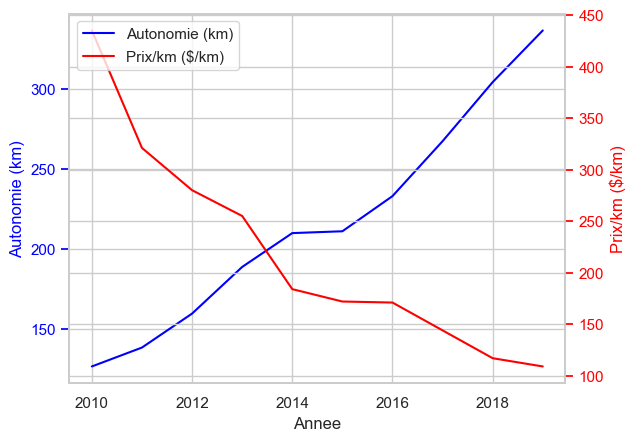

In [154]:
sea.set(style="whitegrid")
fig, ax1 = plt.subplots()

ax1.plot(annee, auto, color='blue', label='Autonomie (km)')
ax1.set_xlabel('Annee')
ax1.set_ylabel('Autonomie (km)', color='blue')
ax1.tick_params('y', colors='blue')


ax2 = ax1.twinx()


ax2.plot(annee, prix_km, color='red', label='Prix/km ($/km)')
ax2.set_ylabel('Prix/km ($/km)', color='red')
ax2.tick_params('y', colors='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()